# description: running a LSTM model for classification of 4 targets in B1 

In [1]:
# loading the library
import numpy as np
import os
import os.path
import scipy.io
from scipy.io import loadmat
import hdf5storage as hdf5s
import h5py


In [4]:

# Experiment info 
# loading the imagined data

# initilize the values
class structtype():
    pass

ExptDays = list(['20201002','20201009','20201016','20201030','20201113','20201117','20201118','20201125','20201211','20201218'])
NumDay = len(ExptDays);
SessionDay = [ structtype() for i in range(NumDay)]
SessionDay[0].hhmmss = list(['145058','145910','150443','151528','152108'])
SessionDay[1].hhmmss = list(['134342','134836','135450','135947'])
SessionDay[2].hhmmss = list(['142924','144138','144924'])
SessionDay[3].hhmmss = list(['133902','134541','134838','141625','142426'])
SessionDay[4].hhmmss = list(['134350','135330','135938','140554'])
SessionDay[5].hhmmss = list(['111747','112508','113040','141009'])
SessionDay[6].hhmmss = list(['140255','140540'])
SessionDay[7].hhmmss = list(['105228','111217','112507','112711','113526','114108','143218','143824'])
SessionDay[8].hhmmss = list(['114458','114725'])
SessionDay[9].hhmmss = list(['104954','105847'])

# for reading mat file from matlab
# it is easier to use class for further extracting necessary params or data
class MatFileAnalyzer():
    
    # first mandatory method; constructor
    def __init__(self,Mat_data):
        self.Fs = Mat_data['TrialData']['Params']['Fs'][0][0]
        self.UpdateRate = Mat_data['TrialData']['Params']['UpdateRate'][0][0]
        self.TargetID = Mat_data['TrialData']['TargetID'][0][0]
        self.SelectedTargetID = Mat_data['TrialData']['SelectedTargetID'][0][0]
        self.MaxReachTime = Mat_data['TrialData']['Params']['MaxReachTime'][0][0]
        self.Click_BinNum = Mat_data['TrialData']['Params']['ClickCounter'][0][0]
        
    def ECoG_Raw(self):

        Signals = Mat_data['TrialData']['BroadbandData']
        BinNum = Signals.shape[0]
        ECoGData = np.empty((0,128), dtype=float)
        for i in range(BinNum):
            Bin = Mat_data['TrialData']['BroadbandData'][i][0]
            BinName = h5py.h5r.get_name(Bin, Mat_data.id)
            BinInfo = Mat_data[BinName] 
            BinData = BinInfo[:,:]
            ECoGData = np.concatenate((ECoGData, BinData.T), axis=0)

        return ECoGData
    
    
    def ECoG_Raw_Trial(self):
        
        Signals = Mat_data['TrialData']['BroadbandData']
        BinNum = Signals.shape[0]
        ECoGData_Trial = np.empty((0,128), dtype=float)
        
        if ExptDays[Day] == '20201002':
        
            for i in range(BinNum-int(self.Click_BinNum),BinNum,1):
                Bin = Mat_data['TrialData']['BroadbandData'][i][0]
                BinName = h5py.h5r.get_name(Bin, Mat_data.id)
                BinInfo = Mat_data[BinName] 
                BinData = BinInfo[:,:]
                ECoGData_Trial = np.concatenate((ECoGData_Trial, BinData.T), axis=0)

            return ECoGData_Trial
        
        else:
                        
            BinControl = [] 
            for i in range(BinNum):
                if Mat_data['TrialData']['TaskState'][i][0] == 3:
                    BinControl.append(i)
             
            for j in BinControl[-int(TrialData.Click_BinNum):]:
                if ExptDays[Day] == '20201009':
                    j=j-1
                    
                Bin = Mat_data['TrialData']['BroadbandData'][j][0]
                BinName = h5py.h5r.get_name(Bin, Mat_data.id)
                BinInfo = Mat_data[BinName] 
                BinData = BinInfo[:,:]
                ECoGData_Trial = np.concatenate((ECoGData_Trial, BinData.T), axis=0)
                
            return ECoGData_Trial
        
    
    def Features_All(self):
        
        Features = Mat_data['TrialData']['NeuralFeatures']
        BinNum = Features.shape[0]
        NeuralFeatures = np.empty((0,896), dtype=float)
        
        if ExptDays[Day] == '20201002':
            
            for i in range(BinNum-int(self.Click_BinNum),BinNum,1):
                Bin = Mat_data['TrialData']['NeuralFeatures'][i][0]
                BinName = h5py.h5r.get_name(Bin, Mat_data.id)
                BinInfo = Mat_data[BinName] 
                BinData = BinInfo[:,:]
                NeuralFeatures = np.concatenate((NeuralFeatures, BinData), axis=0)
                
            return NeuralFeatures
        
        else:
                        
            BinControl = [] 
            for i in range(BinNum):
                if Mat_data['TrialData']['TaskState'][i][0] == 3:
                    BinControl.append(i)
             
            for j in BinControl[-int(TrialData.Click_BinNum):]:
                if ExptDays[Day] == '20201009':
                    j=j-1
                    
                Bin = Mat_data['TrialData']['NeuralFeatures'][j][0]
                BinName = h5py.h5r.get_name(Bin, Mat_data.id)
                BinInfo = Mat_data[BinName] 
                BinData = BinInfo[:,:]
                NeuralFeatures = np.concatenate((NeuralFeatures, BinData), axis=0)
                
            return NeuralFeatures
        
    def SmoothedFeatures_All(self):
        
        Features = Mat_data['TrialData']['SmoothedNeuralFeatures']
        BinNum = Features.shape[0]
        SmoothedNeuralFeatures = np.empty((0,896), dtype=float)
                  
        BinControl = [] 
        for i in range(BinNum):
            if Mat_data['TrialData']['TaskState'][i][0] == 3:
                BinControl.append(i)

        for j in BinControl[-int(TrialData.Click_BinNum):]:
            if ExptDays[Day] == '20201009':
                j=j-1

            Bin = Mat_data['TrialData']['SmoothedNeuralFeatures'][j][0]
            BinName = h5py.h5r.get_name(Bin, Mat_data.id)
            BinInfo = Mat_data[BinName] 
            BinData = BinInfo[:,:]
            SmoothedNeuralFeatures = np.concatenate((SmoothedNeuralFeatures, BinData), axis=0)

        return SmoothedNeuralFeatures   


Trials_T1 = np.empty((0,896), dtype=float)
Trials_T2 = np.empty((0,896), dtype=float)
Trials_T3 = np.empty((0,896), dtype=float)
Trials_T4 = np.empty((0,896), dtype=float)

Trials_Raw_T1 = np.empty((0,128), dtype=float)
Trials_Raw_T2 = np.empty((0,128), dtype=float)
Trials_Raw_T3 = np.empty((0,128), dtype=float)
Trials_Raw_T4 = np.empty((0,128), dtype=float)


# numnber of censequative bins for making correct selections
Click_BinNum_T1 = []
Click_BinNum_T2 = []
Click_BinNum_T3 = []
Click_BinNum_T4 = []

Day_NumTrial_T1 = []
Day_NumTrial_T2 = []
Day_NumTrial_T3 = []
Day_NumTrial_T4 = []


# loading the day/block/session data from the location
# day 0 does not have SmoothedNeuralFeatures
# day 6 the performance was not good
for Day in [ 0, 1, 2, 3, 4, 5, 6, 7, 8]:
    ID1 = 0;
    ID2 = 0;
    ID3 = 0;
    ID4 = 0;

    for Se in range (len(SessionDay[Day].hhmmss)):

        print('Session:'+ SessionDay[Day].hhmmss[Se])
        # in windows
        if ExptDays[Day] in ['20201002','20201009']:
            DataPath =os.path.join('/media/reza/WindowsDrive/BRAVO1','CursorPlatform','Data',ExptDays[Day],'GangulyServer',ExptDays[Day],'RadialTask',SessionDay[Day].hhmmss[Se],'BCI_Fixed')
        
        else:
            DataPath =os.path.join('/media/reza/WindowsDrive/BRAVO1','CursorPlatform','Data',ExptDays[Day],'GangulyServer',ExptDays[Day],'DiscreteArrow',SessionDay[Day].hhmmss[Se],'BCI_Fixed')
        
        datadir = os.listdir(DataPath)

        # loading the trials
        for k in range(len(datadir)):

            print('Trial:',k+1)
            Mat_data = h5py.File(DataPath+'/'+datadir[k])
            TrialData = MatFileAnalyzer(Mat_data)
            ECoG1 = TrialData.ECoG_Raw()
            Fs = TrialData.Fs
            LenSignal = ECoG1.shape[0]
            MaxReachTime = TrialData.MaxReachTime

            # to find successful trials
            if ExptDays[Day] == '20201002' and ((LenSignal/Fs) < (MaxReachTime)):
                #print(True)
                NeuralFeatures = TrialData.Features_All()
                ECoGData_Trial = TrialData.ECoG_Raw_Trial()

                if TrialData.TargetID == 1:
                    ID1 = ID1+1                   
                    Trials_T1 = np.append(Trials_T1, NeuralFeatures, axis=0)
                    Trials_Raw_T1 = np.append(Trials_Raw_T1, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 2:
                    ID2 = ID2+1
                    Trials_T2 = np.append(Trials_T2,NeuralFeatures, axis=0)
                    Trials_Raw_T2 = np.append(Trials_Raw_T2, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 3:
                    ID3 = ID3+1
                    Trials_T3 = np.append(Trials_T3, NeuralFeatures, axis=0)
                    Trials_Raw_T3 = np.append(Trials_Raw_T3, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 4:
                    ID4 = ID4+1
                    Trials_T4 = np.append(Trials_T4, NeuralFeatures, axis=0)
                    Trials_Raw_T4 = np.append(Trials_Raw_T4, ECoGData_Trial, axis=0) 

            elif ExptDays[Day] != '20201002' and TrialData.SelectedTargetID == TrialData.TargetID:
                #print(True)
                NeuralFeatures = TrialData.Features_All()
                SmoothedNeuralFeatures = TrialData.SmoothedFeatures_All()
                ECoGData_Trial = TrialData.ECoG_Raw_Trial()
                
                if TrialData.TargetID == 1:
                    ID1 = ID1+1                   
                    Trials_T1 = np.append(Trials_T1, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T1.append(TrialData.Click_BinNum)
                    Trials_Raw_T1 = np.append(Trials_Raw_T1, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 2:
                    ID2 = ID2+1
                    Trials_T2 = np.append(Trials_T2, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T2.append(TrialData.Click_BinNum)
                    Trials_Raw_T2 = np.append(Trials_Raw_T2, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 3:
                    ID3 = ID3+1
                    Trials_T3 = np.append(Trials_T3, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T3.append(TrialData.Click_BinNum)
                    Trials_Raw_T3 = np.append(Trials_Raw_T3, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 4:
                    ID4 = ID4+1
                    Trials_T4 = np.append(Trials_T4, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T4.append(TrialData.Click_BinNum)
                    Trials_Raw_T4 = np.append(Trials_Raw_T4, ECoGData_Trial, axis=0) 
                    
    Day_NumTrial_T1.append(ID1)
    Day_NumTrial_T2.append(ID2)
    Day_NumTrial_T3.append(ID3)
    Day_NumTrial_T4.append(ID4)
    

print('End of Running Section')  

             

Session:145058
Trial: 1
Trial: 2
Trial: 3
Trial: 4


/home/reza/anaconda3/envs/ECoGControl_RNN/lib/python3.7/site-packages/ipykernel_launcher.py:195: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Session:145910
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Session:150443
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Session:151528
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Session:152108
Trial: 1
Tri

Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Trial: 31
Trial: 32
Session:112507
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Session:112711
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Session:113526
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Session:114108
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Session:143218
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16


In [6]:
# extract hold-out data for one day for test laters
Trials_T1_HoldOut = np.empty((0,896), dtype=float)
Trials_T2_HoldOut = np.empty((0,896), dtype=float)
Trials_T3_HoldOut = np.empty((0,896), dtype=float)
Trials_T4_HoldOut = np.empty((0,896), dtype=float)

Trials_Raw_T1_HoldOut = np.empty((0,128), dtype=float)
Trials_Raw_T2_HoldOut = np.empty((0,128), dtype=float)
Trials_Raw_T3_HoldOut = np.empty((0,128), dtype=float)
Trials_Raw_T4_HoldOut = np.empty((0,128), dtype=float)


# numnber of censequative bins for making correct selections
Click_BinNum_T1_HoldOut = []
Click_BinNum_T2_HoldOut = []
Click_BinNum_T3_HoldOut = []
Click_BinNum_T4_HoldOut = []

Day_NumTrial_T1_HoldOut = []
Day_NumTrial_T2_HoldOut = []
Day_NumTrial_T3_HoldOut = []
Day_NumTrial_T4_HoldOut = []


# loading the day/block/session data from the location
# day 0 does not have SmoothedNeuralFeatures
# day 6 the performance was not good
for Day in [9]:
    ID1 = 0;
    ID2 = 0;
    ID3 = 0;
    ID4 = 0;

    for Se in range (len(SessionDay[Day].hhmmss)):

        print('Session:'+ SessionDay[Day].hhmmss[Se])
        # in windows
        if ExptDays[Day] in ['20201002','20201009']:
            DataPath =os.path.join('/media/reza/WindowsDrive/BRAVO1','CursorPlatform','Data',ExptDays[Day],'GangulyServer',ExptDays[Day],'RadialTask',SessionDay[Day].hhmmss[Se],'BCI_Fixed')
        
        else:
            DataPath =os.path.join('/media/reza/WindowsDrive/BRAVO1','CursorPlatform','Data',ExptDays[Day],'GangulyServer',ExptDays[Day],'DiscreteArrow',SessionDay[Day].hhmmss[Se],'BCI_Fixed')
        
        datadir = os.listdir(DataPath)

        # loading the trials
        for k in range(len(datadir)):

            print('Trial:',k+1)
            Mat_data = h5py.File(DataPath+'/'+datadir[k])
            TrialData = MatFileAnalyzer(Mat_data)
            ECoG1 = TrialData.ECoG_Raw()
            Fs = TrialData.Fs
            LenSignal = ECoG1.shape[0]
            MaxReachTime = TrialData.MaxReachTime

            # to find successful trials
            if ExptDays[Day] == '20201002' and ((LenSignal/Fs) < (MaxReachTime)):
                #print(True)
                NeuralFeatures = TrialData.Features_All()
                ECoGData_Trial = TrialData.ECoG_Raw_Trial()

                if TrialData.TargetID == 1:
                    ID1 = ID1+1                   
                    Trials_T1_HoldOut = np.append(Trials_T1_HoldOut, NeuralFeatures, axis=0)
                    Trials_Raw_T1_HoldOut = np.append(Trials_Raw_T1_HoldOut, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 2:
                    ID2 = ID2+1
                    Trials_T2_HoldOut = np.append(Trials_T2_HoldOut,NeuralFeatures, axis=0)
                    Trials_Raw_T2_HoldOut = np.append(Trials_Raw_T2_HoldOut, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 3:
                    ID3 = ID3+1
                    Trials_T3_HoldOut = np.append(Trials_T3_HoldOut, NeuralFeatures, axis=0)
                    Trials_Raw_T3_HoldOut = np.append(Trials_Raw_T3_HoldOut, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 4:
                    ID4 = ID4+1
                    Trials_T4_HoldOut = np.append(Trials_T4_HoldOut, NeuralFeatures, axis=0)
                    Trials_Raw_T4_HoldOut = np.append(Trials_Raw_T4_HoldOut, ECoGData_Trial, axis=0) 

            elif ExptDays[Day] != '20201002' and TrialData.SelectedTargetID == TrialData.TargetID:
                #print(True)
                NeuralFeatures = TrialData.Features_All()
                SmoothedNeuralFeatures = TrialData.SmoothedFeatures_All()
                ECoGData_Trial = TrialData.ECoG_Raw_Trial()
                
                if TrialData.TargetID == 1:
                    ID1 = ID1+1                   
                    Trials_T1_HoldOut = np.append(Trials_T1_HoldOut, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T1_HoldOut.append(TrialData.Click_BinNum)
                    Trials_Raw_T1_HoldOut = np.append(Trials_Raw_T1_HoldOut, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 2:
                    ID2 = ID2+1
                    Trials_T2_HoldOut = np.append(Trials_T2_HoldOut, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T2_HoldOut.append(TrialData.Click_BinNum)
                    Trials_Raw_T2_HoldOut = np.append(Trials_Raw_T2_HoldOut, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 3:
                    ID3 = ID3+1
                    Trials_T3_HoldOut = np.append(Trials_T3_HoldOut, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T3_HoldOut.append(TrialData.Click_BinNum)
                    Trials_Raw_T3_HoldOut = np.append(Trials_Raw_T3_HoldOut, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 4:
                    ID4 = ID4+1
                    Trials_T4_HoldOut = np.append(Trials_T4_HoldOut, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T4_HoldOut.append(TrialData.Click_BinNum)
                    Trials_Raw_T4_HoldOut = np.append(Trials_Raw_T4_HoldOut, ECoGData_Trial, axis=0) 
                    
    Day_NumTrial_T1_HoldOut.append(ID1)
    Day_NumTrial_T2_HoldOut.append(ID2)
    Day_NumTrial_T3_HoldOut.append(ID3)
    Day_NumTrial_T4_HoldOut.append(ID4)
    

print('End of Running Section')  


Session:104954
Trial: 1
Trial: 2
Trial: 3


/home/reza/anaconda3/envs/ECoGControl_RNN/lib/python3.7/site-packages/ipykernel_launcher.py:50: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Trial: 31
Trial: 32
Session:105847
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Trial: 31
End of Running Section


In [7]:
Trials_T4.shape

(1091, 896)

In [8]:
Day_NumTrial_T4

[24, 28, 21, 32, 28, 35, 10, 51, 9]

In [9]:
 Trials_Raw_T3.shape

(182016, 128)

In [11]:
Trials_Raw_T1_HoldOut.shape

(8141, 128)

In [8]:
import torch

In [9]:
torch.cuda.is_available()

True

In [10]:
torch.cuda.get_device_name(0)

'GeForce GTX 1080'

In [11]:
torch.cuda.device_count()

1

# extracting the HG-LFO for each data point in each trial as feature for later analysis

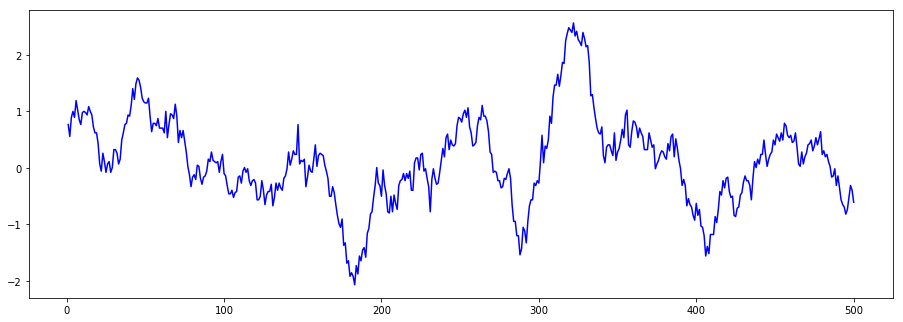

In [12]:
# plot an example of broadband ECoG
import matplotlib.pyplot as plt
%matplotlib inline
t = np.arange(1,500+1,1)
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(t,Trials_Raw_T4[0:500,0],'b')


# Filtering the signal

In [54]:
from scipy.signal import butter, filtfilt, hilbert
import matplotlib.pyplot as plt

All_Signal = [Trials_Raw_T1, Trials_Raw_T2, Trials_Raw_T3, Trials_Raw_T4];

# initilize the values
class structtype():
    pass

HilbertTarget = [ structtype() for i in range(4)]
HilbertTarget[0].feature = [ structtype() for i in range(6)]
HilbertTarget[1].feature = [ structtype() for i in range(6)]
HilbertTarget[2].feature = [ structtype() for i in range(6)]
HilbertTarget[3].feature = [ structtype() for i in range(6)]

for target in range(4):
    print('Target:',target)
    Raw_Signals = All_Signal[target]
    
    # for delta band
    nyq = 0.5 * Fs
    low = 0.5/nyq
    high = 4/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[0] = Hil
    
    # for theta band
    nyq = 0.5 * Fs
    low = 4/nyq
    high = 8/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[1] = Hil
    
    # for alpha band
    nyq = 0.5 * Fs
    low = 8/nyq
    high = 13/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[2] = Hil
    
    # for beta band
    nyq = 0.5 * Fs
    low = 13/nyq
    high = 30/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[3] = Hil
    
    # for gamma1 band
    nyq = 0.5 * Fs
    low = 30/nyq
    high = 50/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[4] = Hil
    
    # for hg-lfo band
    nyq = 0.5 * Fs
    low = 70/nyq
    high = 150/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil1 = np.abs(hilbert(Filtered,axis=0))
    nyq = 0.5 * Fs
    low = 0.5/nyq
    high = 4/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered2 = filtfilt(b,a,Hil1,axis=0)
    Hil2 = Filtered2 + Hil1.mean(0)
    HilbertTarget[target].feature[5] = Hil2
    
print('End of Running Section')  


Target: 0
Target: 1
Target: 2
Target: 3
End of Running Section


(149412, 128)

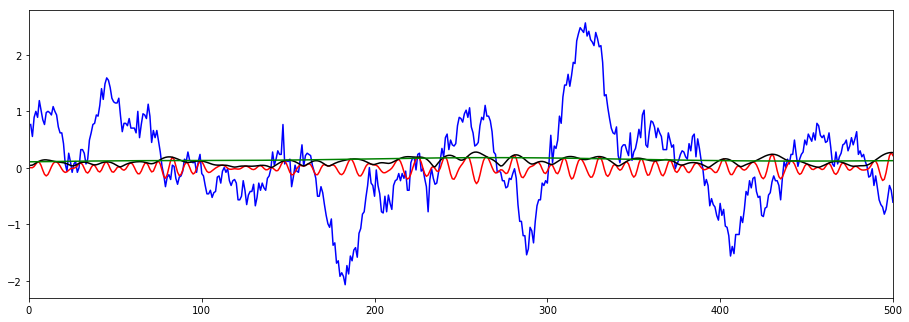

In [14]:
# test the process of filtering signal for hg-lfo
#a, b = Raw_Signals.shape
#t = np.arange(1,a+1,1)
t = np.arange(1,500+1,1)
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(t,Raw_Signals[0:500,0],'b')
ax.plot(t,Filtered[0:500,0],'r')
ax.plot(t,Hil1[0:500,0],'k')
Forplot = HilbertTarget[3].feature[5]
ax.plot(t,Forplot[0:500,0],'g')
ax.set_xlim([0,500])
#ax.set_ylim([0,2])
Raw_Signals.shape

In [55]:
# filtering the holdout data

from scipy.signal import butter, filtfilt, hilbert
import matplotlib.pyplot as plt

All_Signal_HoldOut = [Trials_Raw_T1_HoldOut, Trials_Raw_T2_HoldOut, Trials_Raw_T3_HoldOut, Trials_Raw_T4_HoldOut];

# initilize the values
class structtype():
    pass

HilbertTarget_HoldOut = [ structtype() for i in range(4)]
HilbertTarget_HoldOut[0].feature = [ structtype() for i in range(6)]
HilbertTarget_HoldOut[1].feature = [ structtype() for i in range(6)]
HilbertTarget_HoldOut[2].feature = [ structtype() for i in range(6)]
HilbertTarget_HoldOut[3].feature = [ structtype() for i in range(6)]

for target in range(4):
    print('Target:',target)
    Raw_Signals = All_Signal_HoldOut[target]
    
    # for delta band
    nyq = 0.5 * Fs
    low = 0.5/nyq
    high = 4/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget_HoldOut[target].feature[0] = Hil
    
    # for theta band
    nyq = 0.5 * Fs
    low = 4/nyq
    high = 8/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget_HoldOut[target].feature[1] = Hil
    
    # for alpha band
    nyq = 0.5 * Fs
    low = 8/nyq
    high = 13/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget_HoldOut[target].feature[2] = Hil
    
    # for beta band
    nyq = 0.5 * Fs
    low = 13/nyq
    high = 30/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget_HoldOut[target].feature[3] = Hil
    
    # for gamma1 band
    nyq = 0.5 * Fs
    low = 30/nyq
    high = 50/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget_HoldOut[target].feature[4] = Hil
    
    # for hg-lfo band
    nyq = 0.5 * Fs
    low = 70/nyq
    high = 150/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil1 = np.abs(hilbert(Filtered,axis=0))
    nyq = 0.5 * Fs
    low = 0.5/nyq
    high = 4/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered2 = filtfilt(b,a,Hil1,axis=0)
    Hil2 = Filtered2 + Hil1.mean(0)
    HilbertTarget_HoldOut[target].feature[5] = Hil2
    
print('End of Running Section')  


Target: 0
Target: 1
Target: 2
Target: 3
End of Running Section


# decide the inputs to LSTM

In [92]:
# choosing the broadband ECoG for trials
'''
Data_T1 = Trials_Raw_T1
Data_T2 = Trials_Raw_T2
Data_T3 = Trials_Raw_T3
Data_T4 = Trials_Raw_T4

Data_T1_HoldOut = Trials_Raw_T1_HoldOut
Data_T2_HoldOut = Trials_Raw_T2_HoldOut
Data_T3_HoldOut = Trials_Raw_T3_HoldOut
Data_T4_HoldOut = Trials_Raw_T4_HoldOut





# or choose the feature hg-lfo

Data_T1 = HilbertTarget[0].feature[5]
Data_T2 = HilbertTarget[1].feature[5]
Data_T3 = HilbertTarget[2].feature[5]
Data_T4 = HilbertTarget[3].feature[5]

Data_T1_HoldOut = HilbertTarget_HoldOut[0].feature[5]
Data_T2_HoldOut = HilbertTarget_HoldOut[1].feature[5]
Data_T3_HoldOut = HilbertTarget_HoldOut[2].feature[5]
Data_T4_HoldOut = HilbertTarget_HoldOut[3].feature[5]

'''

# choose three features delta; beta; hg...

Data_T1 = np.concatenate((HilbertTarget[0].feature[0], HilbertTarget[0].feature[3], HilbertTarget[0].feature[5]),axis=1)
Data_T2 = np.concatenate((HilbertTarget[1].feature[0], HilbertTarget[1].feature[3], HilbertTarget[1].feature[5]),axis=1)
Data_T3 = np.concatenate((HilbertTarget[2].feature[0], HilbertTarget[2].feature[3], HilbertTarget[2].feature[5]),axis=1)
Data_T4 = np.concatenate((HilbertTarget[3].feature[0], HilbertTarget[3].feature[3], HilbertTarget[3].feature[5]),axis=1)

Data_T1_HoldOut = np.concatenate((HilbertTarget_HoldOut[0].feature[0], HilbertTarget_HoldOut[0].feature[3], HilbertTarget_HoldOut[0].feature[5]),axis=1)
Data_T2_HoldOut = np.concatenate((HilbertTarget_HoldOut[1].feature[0], HilbertTarget_HoldOut[1].feature[3], HilbertTarget_HoldOut[1].feature[5]),axis=1)
Data_T3_HoldOut = np.concatenate((HilbertTarget_HoldOut[2].feature[0], HilbertTarget_HoldOut[2].feature[3], HilbertTarget_HoldOut[2].feature[5]),axis=1)
Data_T4_HoldOut = np.concatenate((HilbertTarget_HoldOut[3].feature[0], HilbertTarget_HoldOut[3].feature[3], HilbertTarget_HoldOut[3].feature[5]),axis=1)






In [93]:
Trials_Raw_T1.shape

(188978, 128)

In [94]:
Data_T1 = np.concatenate((HilbertTarget[0].feature[0], HilbertTarget[0].feature[3], HilbertTarget[0].feature[5]),axis=1)

In [95]:
Data_T1.shape

(188978, 384)

# Bring the data to torch space / peform LSTM

In [96]:
import torch
import torch.nn as nn
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader

In [102]:
# Hyper parameters
learning_rate = 0.001
sequence_length = 200
hidden_size = 50
num_classes = 4
batch_size = 64
input_size = 3*128
num_layers = 1
num_epochs = 5


In [98]:
# generate the train_data for LSTM
# use neural feature as input or the broad band

Data_T1_torch = torch.from_numpy(Data_T1)
Data_T2_torch = torch.from_numpy(Data_T2)
Data_T3_torch = torch.from_numpy(Data_T3)
Data_T4_torch = torch.from_numpy(Data_T4)


Data_T1_HoldOut_torch = torch.from_numpy(Data_T1_HoldOut)
Data_T2_HoldOut_torch = torch.from_numpy(Data_T2_HoldOut)
Data_T3_HoldOut_torch = torch.from_numpy(Data_T3_HoldOut)
Data_T4_HoldOut_torch = torch.from_numpy(Data_T4_HoldOut)



In [99]:
Data_T1_torch

tensor([[0.2590, 1.4950, 0.7122,  ..., 0.1485, 0.1096, 0.1665],
        [0.3615, 1.1688, 0.5828,  ..., 0.1512, 0.1100, 0.1692],
        [0.3668, 1.1754, 0.5931,  ..., 0.1538, 0.1103, 0.1720],
        ...,
        [0.2592, 0.9770, 0.4853,  ..., 0.1500, 0.1413, 0.1576],
        [0.2703, 0.9798, 0.4929,  ..., 0.1500, 0.1413, 0.1576],
        [0.1644, 1.3622, 0.6565,  ..., 0.1500, 0.1413, 0.1576]],
       dtype=torch.float64)

In [100]:
print(f"Shape of tensor: {Data_T1_torch.shape}")
print(f"Datatype of tensor: {Data_T1_torch.dtype}")
print(f"Device tensor is stored on: {Data_T1_torch.device}")

Shape of tensor: torch.Size([188978, 384])
Datatype of tensor: torch.float64
Device tensor is stored on: cpu


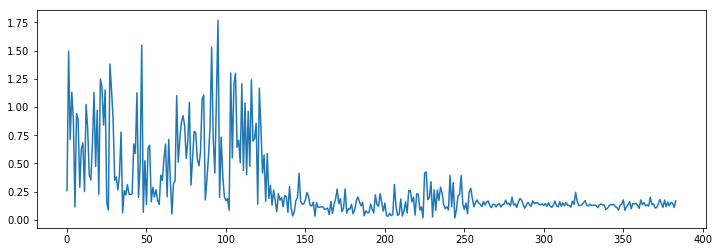

In [103]:
# ploting the first sample data for T1
DataPlot = Data_T1_torch.numpy()
plt.figure(figsize=(12,4))
plt.plot(np.arange(3*128), DataPlot[0][:])

In [104]:
# preparing a batch 

def input_data(data, label, sequence_length, AllData_Set):
    
   # creat this batch
    L = data.shape[0]
    
    for i in range(L-sequence_length):
        window = data[i:i+sequence_length][:]
        #label = label[i+ws:i+ws+1]
        AllData_Set.append((window, label))

    return AllData_Set
    
    

In [105]:
# labeling should start with 0
# by considering batch creation
# determining the temporal dynamics of ECoG 
# feed the data for creating the batches
# append all the targets
AllData_Set = []    
Train_batch_1 = input_data(Data_T1_torch,torch.tensor(0), sequence_length, AllData_Set)
Train_batch_2 = input_data(Data_T2_torch,torch.tensor(1), sequence_length, Train_batch_1)
Train_batch_3 = input_data(Data_T3_torch,torch.tensor(2), sequence_length, Train_batch_2)
Train_batch_4 = input_data(Data_T4_torch,torch.tensor(3), sequence_length, Train_batch_3)

In [106]:
AllData_Set = Train_batch_4

In [107]:
len(AllData_Set)

726660

In [108]:
round (0.3*len(AllData_Set))

217998

In [109]:
AllData_Set[0]

(tensor([[0.2590, 1.4950, 0.7122,  ..., 0.1485, 0.1096, 0.1665],
         [0.3615, 1.1688, 0.5828,  ..., 0.1512, 0.1100, 0.1692],
         [0.3668, 1.1754, 0.5931,  ..., 0.1538, 0.1103, 0.1720],
         ...,
         [0.6914, 0.9198, 1.4899,  ..., 0.2301, 0.1831, 0.2373],
         [0.6875, 0.9267, 1.4926,  ..., 0.2292, 0.1826, 0.2361],
         [0.6830, 0.9323, 1.4961,  ..., 0.2283, 0.1821, 0.2350]],
        dtype=torch.float64),
 tensor(0))

In [110]:
# for holdout data
HoldOutData_Set = []    
Train_batch_1 = input_data(Data_T1_HoldOut_torch,torch.tensor(0), sequence_length, HoldOutData_Set)
Train_batch_2 = input_data(Data_T2_HoldOut_torch,torch.tensor(1), sequence_length, Train_batch_1)
Train_batch_3 = input_data(Data_T3_HoldOut_torch,torch.tensor(2), sequence_length, Train_batch_2)
Train_batch_4 = input_data(Data_T4_HoldOut_torch,torch.tensor(3), sequence_length, Train_batch_3)
HoldOutData_Set = Train_batch_4

In [111]:
len(HoldOutData_Set)

37602

In [112]:
# spliting the data to 70% train and 30% test 
np.random.seed(47)
train_set, test_set = torch.utils.data.random_split(AllData_Set, [round(0.7*len(AllData_Set)),len(AllData_Set)-round(0.7*len(AllData_Set))])


In [113]:
len(train_set)

508662

In [114]:
# batching the data
np.random.seed(47)
train_loader = DataLoader(train_set, batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size, shuffle=False)
holdout_loader = DataLoader(HoldOutData_Set, batch_size, shuffle=False)


In [115]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)
            
def __len__(self):
    """Number of batches"""
    return len(self.dl)

In [116]:
device = get_default_device()
device

device(type='cuda')

In [117]:
# create the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
        # additional layer for classification problem
        #self.SoftAct = nn.Softmax()
    
    def forward(self, x):
        h = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h, c))  
        
        out = self.fc(out[:, -1, :])
        
        # additional layer for classification problem
        # out = self.SoftAct(out)
        
        return out
    

In [97]:
test1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
h = torch.zeros(num_layers, images.size(0), hidden_size)
c = torch.zeros(num_layers, images.size(0), hidden_size)

In [99]:
out1, out2 = test1(images.cpu(), (h, c))

In [101]:
out1.shape

torch.Size([48, 200, 50])

In [112]:
q1 = out2[1]
q1.shape

torch.Size([1, 48, 50])

In [113]:
test2 = nn.Linear(hidden_size, num_classes) 

In [115]:
q1 = out1[:, -1, :]
q1.shape

torch.Size([48, 50])

In [117]:
test2(q1).shape

torch.Size([48, 4])

In [118]:
model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
to_device(model, device)

LSTMModel(
  (lstm): LSTM(384, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=4, bias=True)
)

In [119]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [120]:
# Train the model

All_y_pred = []
All_y_train = []
Accuracy_test = []

#model = model.to(torch.long)
model = model.to(torch.float)

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #print(labels.shape)
        labels = labels.T
        
        # for saving
        All_y_train.append(labels.numpy())
        
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(torch.long)
        labels = labels.to(device)
        
        #labels = labels.to(torch.float)
        
        # test with random inputs
        #target = torch.empty(batch_size, dtype=torch.long).random_(num_classes)
        #labels_1 = target
        
        #images = images.to(torch.long)
        images = images.to(torch.float)
        
        # zero the parameter gradients
        #optimizer.zero_grad()
        # reset hidden states
        #model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
        
                
        # Forward pass
        outputs = model(images)
        #outputs = outputs.to(torch.long)
        outputs = outputs.to(torch.float)
        loss = criterion(outputs, labels)
        
        # for saving 
        _, predicted = torch.max(outputs.data, 1)
        All_y_pred.append(predicted.cpu().numpy())
        
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
    # Evaluate the model
    #model.eval()
    with torch.no_grad():
        right = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, sequence_length, input_size).to(device)
            labels = labels.T
            labels = labels.to(torch.long)
            labels = labels.to(device)
            images = images.to(torch.float)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            right += (predicted == labels).sum().item()
            Accuracy_test.append(100 * right / total)

    print('Test Accuracy of the model on the test images: {} %'.format(100 * right / total))

Epoch [1/5], Step [100/7948], Loss: 1.0243
Epoch [1/5], Step [200/7948], Loss: 0.9855
Epoch [1/5], Step [300/7948], Loss: 0.8607
Epoch [1/5], Step [400/7948], Loss: 0.8543
Epoch [1/5], Step [500/7948], Loss: 0.8632
Epoch [1/5], Step [600/7948], Loss: 0.7700
Epoch [1/5], Step [700/7948], Loss: 0.7311
Epoch [1/5], Step [800/7948], Loss: 0.5929
Epoch [1/5], Step [900/7948], Loss: 0.5671
Epoch [1/5], Step [1000/7948], Loss: 0.5789
Epoch [1/5], Step [1100/7948], Loss: 0.6198
Epoch [1/5], Step [1200/7948], Loss: 0.5804
Epoch [1/5], Step [1300/7948], Loss: 0.4404
Epoch [1/5], Step [1400/7948], Loss: 0.3675
Epoch [1/5], Step [1500/7948], Loss: 0.4840
Epoch [1/5], Step [1600/7948], Loss: 0.4640
Epoch [1/5], Step [1700/7948], Loss: 0.3934
Epoch [1/5], Step [1800/7948], Loss: 0.3691
Epoch [1/5], Step [1900/7948], Loss: 0.5371
Epoch [1/5], Step [2000/7948], Loss: 0.3521
Epoch [1/5], Step [2100/7948], Loss: 0.5788
Epoch [1/5], Step [2200/7948], Loss: 0.4742
Epoch [1/5], Step [2300/7948], Loss: 0.27

Epoch [3/5], Step [2700/7948], Loss: 0.0005
Epoch [3/5], Step [2800/7948], Loss: 0.0663
Epoch [3/5], Step [2900/7948], Loss: 0.0451
Epoch [3/5], Step [3000/7948], Loss: 0.0417
Epoch [3/5], Step [3100/7948], Loss: 0.0084
Epoch [3/5], Step [3200/7948], Loss: 0.0006
Epoch [3/5], Step [3300/7948], Loss: 0.1460
Epoch [3/5], Step [3400/7948], Loss: 0.0145
Epoch [3/5], Step [3500/7948], Loss: 0.0059
Epoch [3/5], Step [3600/7948], Loss: 0.0012
Epoch [3/5], Step [3700/7948], Loss: 0.0221
Epoch [3/5], Step [3800/7948], Loss: 0.0037
Epoch [3/5], Step [3900/7948], Loss: 0.0620
Epoch [3/5], Step [4000/7948], Loss: 0.0018
Epoch [3/5], Step [4100/7948], Loss: 0.0008
Epoch [3/5], Step [4200/7948], Loss: 0.0055
Epoch [3/5], Step [4300/7948], Loss: 0.0014
Epoch [3/5], Step [4400/7948], Loss: 0.0003
Epoch [3/5], Step [4500/7948], Loss: 0.0004
Epoch [3/5], Step [4600/7948], Loss: 0.0011
Epoch [3/5], Step [4700/7948], Loss: 0.0006
Epoch [3/5], Step [4800/7948], Loss: 0.0002
Epoch [3/5], Step [4900/7948], L

Epoch [5/5], Step [5300/7948], Loss: 0.0017
Epoch [5/5], Step [5400/7948], Loss: 0.0020
Epoch [5/5], Step [5500/7948], Loss: 0.1660
Epoch [5/5], Step [5600/7948], Loss: 0.0034
Epoch [5/5], Step [5700/7948], Loss: 0.0007
Epoch [5/5], Step [5800/7948], Loss: 0.0041
Epoch [5/5], Step [5900/7948], Loss: 0.0049
Epoch [5/5], Step [6000/7948], Loss: 0.0032
Epoch [5/5], Step [6100/7948], Loss: 0.0007
Epoch [5/5], Step [6200/7948], Loss: 0.0032
Epoch [5/5], Step [6300/7948], Loss: 0.0015
Epoch [5/5], Step [6400/7948], Loss: 0.1538
Epoch [5/5], Step [6500/7948], Loss: 0.0225
Epoch [5/5], Step [6600/7948], Loss: 0.0005
Epoch [5/5], Step [6700/7948], Loss: 0.0007
Epoch [5/5], Step [6800/7948], Loss: 0.0004
Epoch [5/5], Step [6900/7948], Loss: 0.0010
Epoch [5/5], Step [7000/7948], Loss: 0.0002
Epoch [5/5], Step [7100/7948], Loss: 0.0062
Epoch [5/5], Step [7200/7948], Loss: 0.0346
Epoch [5/5], Step [7300/7948], Loss: 0.0042
Epoch [5/5], Step [7400/7948], Loss: 0.0009
Epoch [5/5], Step [7500/7948], L

In [95]:
images.shape




torch.Size([48, 200, 128])

In [74]:
0.0020 + 0.3192 + 0.1581 + 0.5207

1.0

In [215]:
target.shape


torch.Size([64])

In [245]:
labels-1

tensor([3, 3, 3, 0, 0, 0, 2, 2, 0, 2, 3, 3, 0, 2, 1, 2, 3, 1, 1, 3, 3, 3, 2, 0,
        1, 2, 0, 1, 1, 0, 0, 0, 3, 2, 2, 2, 2, 2, 0, 0, 3, 0, 3, 1, 0, 1, 3, 3,
        2, 1, 3, 3, 1, 0, 0, 0, 3, 3, 1, 2, 1, 3, 0, 3])

In [244]:
labels_1

tensor([1, 2, 2, 2, 3, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 3, 1, 3, 3, 2, 0, 3, 2, 1,
        3, 0, 0, 3, 0, 2, 3, 0, 2, 0, 0, 3, 2, 0, 2, 1, 3, 0, 2, 2, 1, 3, 2, 2,
        2, 2, 3, 0, 3, 1, 0, 2, 3, 1, 0, 2, 3, 0, 3, 3])

In [121]:
# check the number of parameters in layers
for p in model.parameters():
    print(p.numel())

76800
10000
200
200
200
4


In [81]:
All_y_pred[0]
#All_y_train = []

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [82]:
All_y_train[0].T

array([2., 2., 3., 2., 2., 1., 0., 1., 2., 0., 1., 1., 2., 1., 3., 2., 3.,
       0., 2., 3., 3., 3., 3., 3., 2., 2., 0., 2., 1., 3., 2., 1., 0., 2.,
       1., 1., 1., 0., 0., 1., 2., 1., 3., 3., 3., 3., 0., 1., 2., 2., 3.,
       0., 3., 3., 1., 3., 3., 2., 2., 3., 0., 1., 3., 3.], dtype=float32)

In [83]:
((All_y_pred[0] == All_y_train[0].T).sum().item())/batch_size*100

32.8125

In [122]:
Accuracies = []
for i in range(len(All_y_pred)):
    acc = ((All_y_pred[i] == All_y_train[i].T).sum().item())/batch_size*100
    Accuracies.append(acc)
    
    

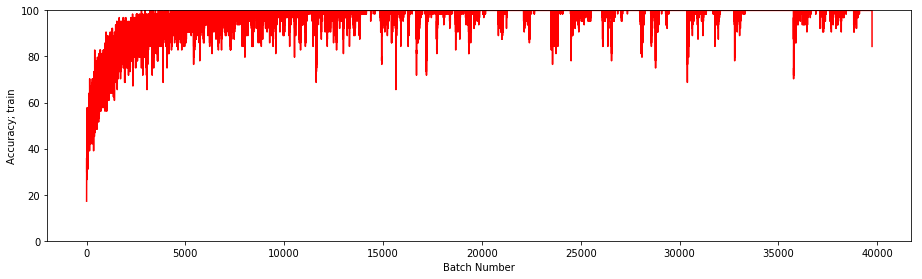

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
t_bin = np.arange(0,len(All_y_pred),1)
fig = plt.figure(figsize=(15,4))
ax = fig.add_axes([.10,.10,0.8,.8])
ax.plot(t_bin,Accuracies,'r')
ax.set_ylabel('Accuracy; train')
ax.set_xlabel('Batch Number')
plt.ylim([0, 100])
#plt.savefig('LSTM_Classification3_train3Features_4target.png',facecolor='w', transparent=False, dpi=300)


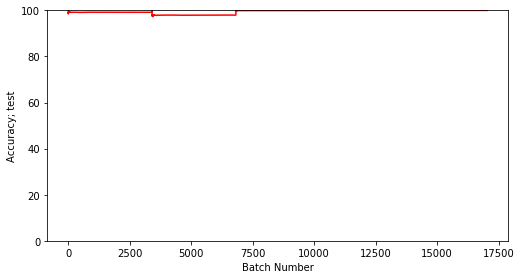

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
t_bin = np.arange(0,len(Accuracy_test),1)
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([.10,.10,0.8,.8])
ax.plot(t_bin,Accuracy_test,'r')
ax.set_ylabel('Accuracy; test')
ax.set_xlabel('Batch Number')
plt.ylim([0, 100])
#plt.savefig('LSTM_Classification3_test3Features_4target.png',facecolor='w', transparent=False, dpi=300)

In [125]:
# Evaluate the model
#model.eval()
# test on holdout data

Accuracy_holdout = []

with torch.no_grad():
    right = 0
    total = 0
    for images, labels in holdout_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.T
        #print(labels)
        labels = labels.to(torch.long)
        labels = labels.to(device)
        images = images.to(torch.float)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        right += (predicted == labels).sum().item()
        Accuracy_holdout.append(100 * right / total)

print('Test Accuracy of the model on the test images: {} %'.format(100 * right / total))

Test Accuracy of the model on the test images: 50.05052922716877 %


In [85]:
len(holdout_loader)/4

147.0

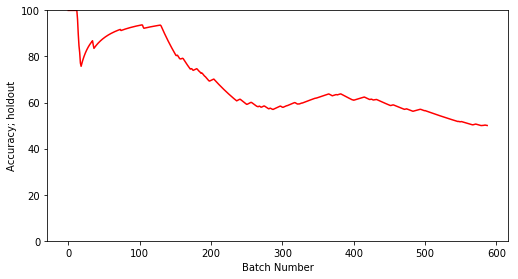

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline
t_bin = np.arange(0,len(Accuracy_holdout),1)
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([.10,.10,0.8,.8])
ax.plot(t_bin,Accuracy_holdout,'r')
ax.set_ylabel('Accuracy; holdout')
ax.set_xlabel('Batch Number')
plt.ylim([0, 100])
#plt.savefig('LSTM_Classification3_holdout3Features_4target.png',facecolor='w', transparent=False, dpi=300)
